# Visualizing Green Energy Solutions: Data Insights for Octopus Energy

## Table of Contents
1. [Introduction](#Introduction)
2. [Import Libraries](#Import-Libraries)
3. [Cleaning and EDA](#Cleaning-and-EDA)
   - [Visualization of Energy Trends](#Visualization-of-Energy-Trends)
   - [Data Transformation and Visualization for Hourly Energy Pricing](#Data-Transformation-and-Visualization-for-Hourly-Energy-Pricing)
   - [Analyzing Solar Energy Generation by Hour](#Analyzing-Solar-Energy-Generation-by-Hour)
   - [Analysis of Wind Energy Generation Trends](#Analysis-of-Wind-Energy-Generation-Trends)
   - [Visualizing Hourly Energy Demand](#Visualizing-Hourly-Energy-Demand)
   - [Visualizing Ideal Hourly Energy Demand](#Visualizing-Ideal-Hourly-Energy-Demand)
4. [Conclusion](#Conclusion)

## Introduction <a id="Introduction"></a>

Welcome to the "Visualizing Green Energy Solutions: Data Insights for Octopus Energy" Jupyter Notebook. This document is a vital component of the broader project initiative presented by BrainStation in collaboration with Octopus Energy. The goal of this project is to harness the power of data visualization to promote the effective use of renewable energy and to empower users to make informed decisions about their energy consumption.

In this notebook, we will delve into the data, focusing on the usage patterns and cost analysis of energy consumption. The visualizations generated here are designed to highlight trends, identify peak usage times, and suggest optimal energy consumption behaviors. This effort aligns with Octopus Energy’s mission to transition homes to 100% renewable energy sources by providing tools that help manage energy use more efficiently.

The visual components presented in this notebook are built to convey complex information in an intuitive format, making it easier for stakeholders, from consumers to management, to understand and act upon. Whether you are a data scientist, a product manager, or a stakeholder at Octopus Energy, these insights are crafted to aid in decision-making processes and to foster a deeper understanding of the dynamics of energy consumption.

By the end of this notebook, you should have a clearer picture of how data visualization can be a powerful ally in promoting sustainable energy practices and enhancing consumer engagement. Let’s dive into the data and start making a difference with every electron we analyze and visualize.


## Import Libraries <a id="Import-Libraries"></a>

Load essential Python libraries necessary for data manipulation, numerical operations, and visualization. These libraries lay the foundation for our data analysis and graphical output throughout the notebook.

- `numpy` (np): Handles large, multi-dimensional arrays and matrices, alongside a large collection of high-level mathematical functions to operate on these arrays.
- `pandas` (pd): Offers data structures and operations for manipulating numerical tables and time series.
- `matplotlib.pyplot` (plt): Provides a MATLAB-like plotting framework.
- `seaborn` (sns): Enhances matplotlib’s graphics with additional plot types and styles, making graphics more attractive and informative with less syntax.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

## Cleaning and EDA <a id="Cleaning-and-EDA"></a>

**Data Loading**

This section of the notebook is focused on loading the dataset named 'uk_renewable_energy.csv' into a pandas DataFrame called `df2`. We aim to analyze trends in renewable energy usage in the UK over the years. The initial data preview with `DataFrame.head()` provides a quick glance at the structure and the type of data we are working with, which is crucial for understanding the dataset's scope and to plan subsequent data analysis and cleaning steps.

The first few rows of the dataset will be displayed, offering a preliminary look at the data's format and the types of energy sources recorded. This helps in identifying any immediate inconsistencies or anomalies that need addressing in the early stages of the data analysis pipeline.



In [2]:
df2 = pd.read_csv('uk_renewable_energy.csv')

In [3]:
df2.head()

,Year,Energy from renewable & waste sources,Total energy consumption of primary fuels and equivalents,Fraction from renewable sources and waste,Hydroelectric power,"Wind, wave, tidal",Solar photovoltaic,Geothermal aquifers,Landfill gas,Sewage gas,...,Municipal solid waste (MSW),Poultry litter,Straw,Wood,Charcoal,Liquid bio-fuels,Bioethanol,Biodiesel,Biomass,Cross-boundary Adjustment
0,1990,1.647,225.532,0.007,0.448,0.001,0.0,0.001,0.080,0.138,...,0.183,0.000,0.007,0.687,0.039,0.0,0.0,0.0,0.065,0.0
1,1991,1.634,231.288,0.007,0.398,0.001,0.0,0.001,0.105,0.151,...,0.185,0.000,0.007,0.687,0.036,0.0,0.0,0.0,0.065,0.0
2,1992,1.843,228.696,0.008,0.467,0.003,0.0,0.001,0.155,0.151,...,0.210,0.016,0.007,0.736,0.033,0.0,0.0,0.0,0.065,0.0
3,1993,1.862,231.368,0.008,0.370,0.019,0.0,0.001,0.162,0.158,...,0.268,0.043,0.007,0.736,0.034,0.0,0.0,0.0,0.065,0.0
4,1994,2.528,230.739,0.011,0.438,0.030,0.0,0.001,0.188,0.170,...,0.385,0.101,0.007,1.108,0.034,0.0,0.0,0.0,0.065,0.0


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 21 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Year                                                       31 non-null     int64  
 1   Energy from renewable & waste sources                      31 non-null     float64
 2   Total energy consumption of primary fuels and equivalents  31 non-null     float64
 3   Fraction from renewable sources and waste                  31 non-null     float64
 4   Hydroelectric power                                        31 non-null     float64
 5   Wind, wave, tidal                                          31 non-null     float64
 6   Solar photovoltaic                                         31 non-null     float64
 7   Geothermal aquifers                                        31 non-null     float64
 8   Landfill gas

These cells provides an overview of the dataset's structure using the `DataFrame.info()` method. This is a critical step to ensure the data is well-organized and to assess the completeness and type of the data, which directly impacts the analytical methods we can apply.

The DataFrame consists of 21 columns, each representing a different type of energy source or metric, such as Hydroelectric power, Wind, Solar photovoltaic, and more. 
The data spans 31 entries, each corresponding to a year of records from 1990 to 2020.
All columns are reported as non-null, which indicates there are no missing values in this dataset—a rarity in real-world data scenarios that often requires careful preprocessing to address.

A detailed summary of the DataFrame is provided, including the number of entries, the total number of columns, and the data type of each column. This output is fundamental for understanding the underlying data structure, preparing us for detailed data manipulation, analysis, and visualization tasks that will follow in this project.


This code cell is dedicated to refining the dataset by focusing on the columns most pertinent to our analysis of renewable energy trends in the UK. We narrow down the dataset to key metrics that will provide insights into the overall energy consumption, the proportion of energy from renewable sources, and the specifics of wind, wave, tidal, and solar photovoltaic energy production.

**Key Columns Retained**:
- `Year`: The year of the data record, which serves as the time dimension for our analysis.
- `Energy from renewable & waste sources`: Total energy output from renewable sources and waste, which helps assess the contribution of renewables to national energy needs.
- `Total energy consumption of primary fuels and equivalents`: Measures the UK's total energy consumption, providing a context to the renewable energy figures.
- `Fraction from renewable sources and waste`: The proportion of total energy that comes from renewable sources, indicating the penetration of renewable energy in the energy mix.
- `Wind, wave, tidal`: Specific data on these renewable sources, which are significant due to the UK's geographic advantage in harnessing wind and tidal power.
- `Solar photovoltaic`: Solar energy data, reflecting trends in solar technology adoption and usage.

The resulting DataFrame `df2` will contain only the selected columns. This filtered view allows for a more focused analysis on the specified aspects of renewable energy, facilitating clearer and more specific insights into how these sectors are evolving over the years.


In [5]:
df2 = df2[['Year', 'Energy from renewable & waste sources', 'Total energy consumption of primary fuels and equivalents', 'Fraction from renewable sources and waste', 'Wind, wave, tidal', 'Solar photovoltaic']]

### Visualization of Energy Trends <a id="Visualization-of-Energy-Trends"></a>

This visualization aims to compare the trends in energy consumption from renewable sources versus total energy consumption from all primary fuels over the years. By plotting these trends on the same graph, we can visually assess the growth of renewable energy in relation to overall energy consumption, highlighting the shift towards more sustainable energy sources.

**Graph Details**:
- **Renewables Line (Blue)**: Represents the energy obtained from renewable and waste sources each year, giving an indication of how renewable energy production has evolved.
- **Fuels Line (Pink)**: Shows the total energy consumption from all primary fuels and equivalents, providing context on general energy consumption trends.


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

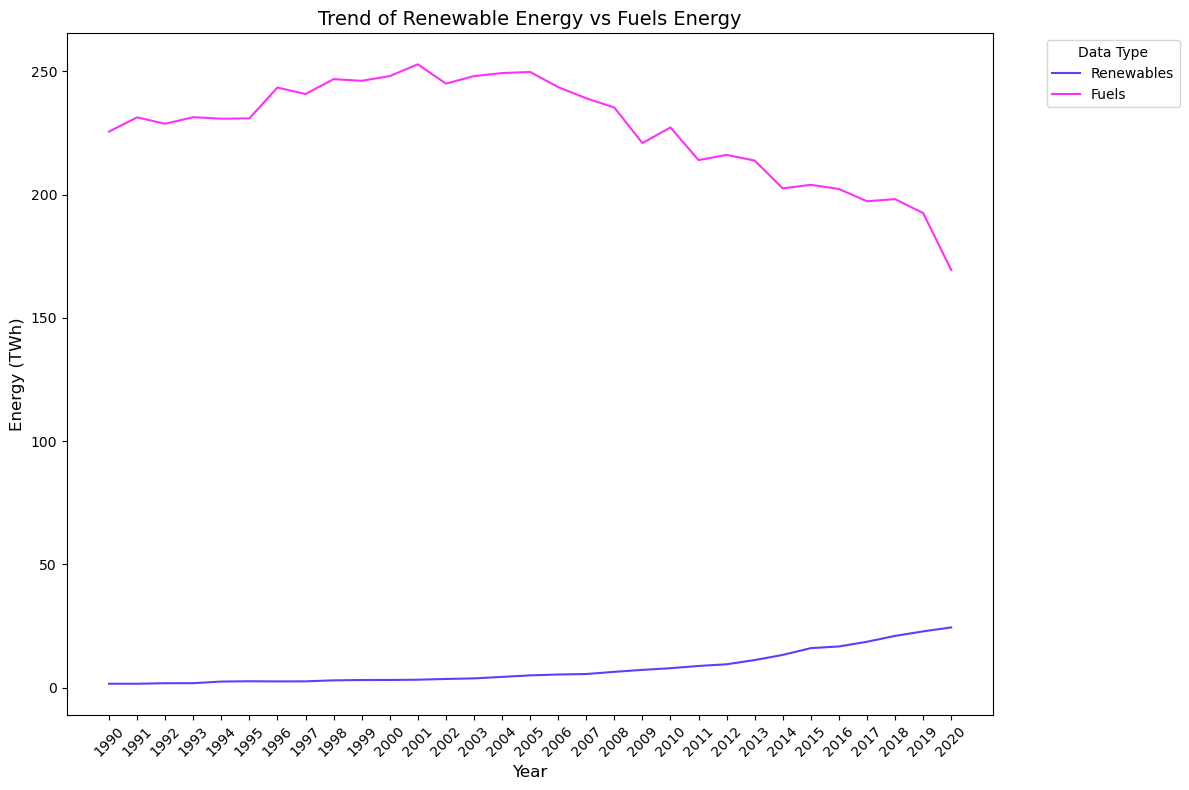

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(12, 8))

# Create the line chart for "Energy from renewable & waste sources"
sns.lineplot(x='Year', y='Energy from renewable & waste sources',
             data=df2, label='Renewables', color='#5840FF')

# Create the line chart for "Total energy consumption of primary fuels and equivalents"
sns.lineplot(x='Year', y='Total energy consumption of primary fuels and equivalents',
             data=df2, label='Fuels', color='#FF2FFB')

# Update the titles to match the displayed data
plt.title('Trend of Renewable Energy vs Fuels Energy', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Energy (TWh)', fontsize=12)

# Get the minimum and maximum year to set the ticks on the x-axis
minimum_year = int(df2['Year'].min())
maximum_year = int(df2['Year'].max())

# Set ticks for whole years with a step of 1 and improve readability by rotating them
plt.xticks(np.arange(minimum_year, maximum_year + 1, 1), rotation=45)
plt.legend(title='Data Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()





**Key Observations**:
- The scale of fuel energy consumption remains much higher than that of renewable energy, but the steady increase in renewables highlights the ongoing transition within the energy sector.
- The decline in fuel energy consumption in recent years could be attributed to several factors including advances in technology, regulatory changes, economic shifts, and increased public awareness and demand for green energy.

**Implications for Policy and Decision Making**:
- The trends suggest a positive direction towards sustainability but also highlight the need for continued support and investment in renewable energy technologies.
- Policymakers and industry stakeholders might use this data to strengthen the case for renewable energy incentives and infrastructure development.

**Suggestions for Further Analysis**:
- Conducting a similar analysis with updated data post-2020 could provide insights into how recent global events and policy changes have further influenced these trends.
- Further breakdown of renewable energy sources (e.g., separating wind, solar, and hydro) would offer more detailed insights into which technologies are driving the growth in renewables.

**Loading Time Series Energy Data**

This section involves loading a comprehensive dataset from 'time_series_30min_singleindex.csv', which includes detailed half-hourly energy data across multiple regions and metrics. This initial step is crucial for gaining a preliminary understanding of the data's structure and identifying any immediate modifications required for effective analysis.

The first few rows of the data will be displayed to provide an initial look at the dataset, focusing particularly on understanding the range of metrics recorded, such as actual and forecasted loads, generation from various energy sources, and more.
We expect to see multiple columns, including timestamps in UTC and CET/CEST zones, and various energy-related measurements across different geographic regions.


In [7]:
df4 = pd.read_csv('time_series_30min_singleindex.csv')
df4.head()

,utc_timestamp,cet_cest_timestamp,CY_load_actual_entsoe_transparency,CY_load_forecast_entsoe_transparency,CY_wind_onshore_generation_actual,GB_GBN_load_actual_entsoe_transparency,GB_GBN_load_forecast_entsoe_transparency,GB_GBN_solar_capacity,GB_GBN_solar_generation_actual,GB_GBN_solar_profile,...,GB_UKM_wind_offshore_generation_actual,GB_UKM_wind_onshore_capacity,GB_UKM_wind_onshore_generation_actual,IE_load_actual_entsoe_transparency,IE_load_forecast_entsoe_transparency,IE_wind_onshore_generation_actual,IE_sem_load_actual_entsoe_transparency,IE_sem_load_forecast_entsoe_transparency,IE_sem_price_day_ahead,IE_sem_wind_onshore_generation_actual
0,2014-12-31T23:00:00Z,2015-01-01T00:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-12-31T23:30:00Z,2015-01-01T00:30:00+0100,NaN,NaN,NaN,NaN,NaN,2664.0,NaN,NaN,...,NaN,8173.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01T00:00:00Z,2015-01-01T01:00:00+0100,NaN,NaN,NaN,NaN,NaN,2669.0,NaN,NaN,...,NaN,8174.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-01T00:30:00Z,2015-01-01T01:30:00+0100,NaN,NaN,NaN,26758.0,32057.0,2669.0,NaN,NaN,...,NaN,8174.0,385.33,2832.37,3550.0,1335.88,3681.37,NaN,NaN,1721.21
4,2015-01-01T01:00:00Z,2015-01-01T02:00:00+0100,NaN,NaN,NaN,27561.0,32135.0,2669.0,NaN,NaN,...,NaN,8174.0,1050.04,2726.20,3403.0,1289.69,3523.20,NaN,NaN,1675.24


In [8]:
df4.drop(['cet_cest_timestamp'], axis=1, inplace=True)

To streamline our analysis, we remove the 'cet_cest_timestamp' column from the DataFrame `df4`. This column is redundant as it provides time information similar to the 'utc_timestamp' but in the CET/CEST time zone, which is not necessary for our analysis focused on a broader geographic scope or based solely on UTC time.


**Selecting Specific Columns for Detailed Analysis**

This section is focused on refining our dataset by selectively keeping columns that are particularly relevant for our energy analysis. We are interested in all columns that pertain to Great Britain (`GB` prefix), along with any columns containing the terms 'price' and 'forecast' across different regions. This selective focus allows us to hone in on specific data that will likely be crucial for trend analysis and forecasting in energy consumption and production.


In [9]:
# Name of the specific column you want to keep as the first column
specified_column = 'utc_timestamp'

# Use a list comprehension to select columns that start with 'gb'
cols_to_keep = [col for col in df4.columns if col.startswith('GB') or 'price' in col.lower() or 'forecast' in col.lower()]

# Ensure the specified column is the first by adding it to the beginning of the list
if specified_column not in cols_to_keep:
    cols_to_keep.insert(0, specified_column)
else:
    # If the column is already present (for instance starts with 'gb'), remove it and add it to the beginning
    cols_to_keep.remove(specified_column)
    cols_to_keep.insert(0, specified_column)

# Select these columns from the DataFrame based on the specified order
df4 = df4[cols_to_keep]



In [10]:
df4.head()

,utc_timestamp,CY_load_forecast_entsoe_transparency,GB_GBN_load_actual_entsoe_transparency,GB_GBN_load_forecast_entsoe_transparency,GB_GBN_solar_capacity,GB_GBN_solar_generation_actual,GB_GBN_solar_profile,GB_GBN_wind_capacity,GB_GBN_wind_generation_actual,GB_GBN_wind_profile,...,GB_UKM_solar_generation_actual,GB_UKM_wind_capacity,GB_UKM_wind_generation_actual,GB_UKM_wind_offshore_capacity,GB_UKM_wind_offshore_generation_actual,GB_UKM_wind_onshore_capacity,GB_UKM_wind_onshore_generation_actual,IE_load_forecast_entsoe_transparency,IE_sem_load_forecast_entsoe_transparency,IE_sem_price_day_ahead
0,2014-12-31T23:00:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-12-31T23:30:00Z,NaN,NaN,NaN,2664.0,NaN,NaN,11554.0,NaN,NaN,...,NaN,12212.0,NaN,4040.0,NaN,8173.0,NaN,NaN,NaN,NaN
2,2015-01-01T00:00:00Z,NaN,NaN,NaN,2669.0,NaN,NaN,11555.0,NaN,NaN,...,NaN,12214.0,NaN,4040.0,NaN,8174.0,NaN,NaN,NaN,NaN
3,2015-01-01T00:30:00Z,NaN,26758.0,32057.0,2669.0,NaN,NaN,11555.0,NaN,NaN,...,NaN,12214.0,NaN,4040.0,NaN,8174.0,385.33,3550.0,NaN,NaN
4,2015-01-01T01:00:00Z,NaN,27561.0,32135.0,2669.0,NaN,NaN,11555.0,NaN,NaN,...,NaN,12214.0,NaN,4040.0,NaN,8174.0,1050.04,3403.0,NaN,NaN


After refining the dataset to include only the most relevant columns, this section provides a preview of the newly structured DataFrame. This step is critical to verify that our data selection aligns with our analysis requirements and that the DataFrame is correctly organized.


**Narrowing Down Data for Forecast and Pricing Analysis**

To focus our analysis further, this section involves narrowing down the dataset to include only a few key columns that are essential for forecasting and price analysis. The columns selected are `utc_timestamp`, `GB_UKM_load_forecast_entsoe_transparency`, `IE_sem_load_forecast_entsoe_transparency`, and `IE_sem_price_day_ahead`. These columns represent forecast data and pricing for specific regions, which are crucial for our energy market analysis.


In [11]:
df4 = df4[['utc_timestamp', 'GB_UKM_load_forecast_entsoe_transparency', 'IE_sem_load_forecast_entsoe_transparency', 'IE_sem_price_day_ahead']]

In [12]:
df4.head()

,utc_timestamp,GB_UKM_load_forecast_entsoe_transparency,IE_sem_load_forecast_entsoe_transparency,IE_sem_price_day_ahead
0,2014-12-31T23:00:00Z,NaN,NaN,NaN
1,2014-12-31T23:30:00Z,NaN,NaN,NaN
2,2015-01-01T00:00:00Z,NaN,NaN,NaN
3,2015-01-01T00:30:00Z,NaN,NaN,NaN
4,2015-01-01T01:00:00Z,NaN,NaN,NaN


In [13]:
df4.describe()

,GB_UKM_load_forecast_entsoe_transparency,IE_sem_load_forecast_entsoe_transparency,IE_sem_price_day_ahead
count,99024.000000,98976.000000,64096.000000
mean,34271.001373,4237.132535,47.343633
std,7814.439149,886.795281,21.124401
min,1443.460000,1992.000000,-100.000000
25%,28223.802500,3485.547500,34.957500
50%,34236.260000,4318.230000,43.230000
75%,40037.130000,4894.970000,54.440000
max,57927.700000,6762.490000,1000.000000


Following the restructuring of the DataFrame to focus on forecast and pricing data, this cell provides a statistical summary of the selected columns. This summary helps in understanding the central tendencies, variability, and presence of outliers in our data, which are critical for any further detailed analysis and modeling.


This section involves two key data transformations aimed at refining our analysis:
1. **Timestamp Conversion**: The `utc_timestamp` column is converted from a string format to a `datetime` object. This conversion is crucial for time series analysis as it allows for more precise and efficient manipulation of date and time data within pandas.
2. **New Derived Column Creation**: We introduce a new column, `GB_load_price_day_ahead`, calculated from existing data. This column aims to estimate the day-ahead price of energy for the GB region based on IE (Ireland) pricing data, adjusted by the load forecasts for both regions.


In [14]:
df4['utc_timestamp'] = pd.to_datetime(df4['utc_timestamp'])

In [15]:
df4['GB_load_price_day_ahead'] = df4['IE_sem_price_day_ahead'] / df4['IE_sem_load_forecast_entsoe_transparency'] * df4['GB_UKM_load_forecast_entsoe_transparency']

### Data Transformation and Visualization for Hourly Energy Pricing <a id="Data-Transformation-and-Visualization-for-Hourly-Energy-Pricing"></a>

The goal of this code block is to transform the `utc_timestamp` column into a more usable format for time series analysis, derive new insights by aggregating data based on the hour of the day, and visually analyze the average day-ahead pricing for energy across different hours.

**Expected Outcome**:
- A clear and detailed bar plot showing the hourly variation in GB load pricing, with distinct colors marking the hours with the highest and lowest average prices, aiding in identifying peak pricing hours and potential off-peak discounts.

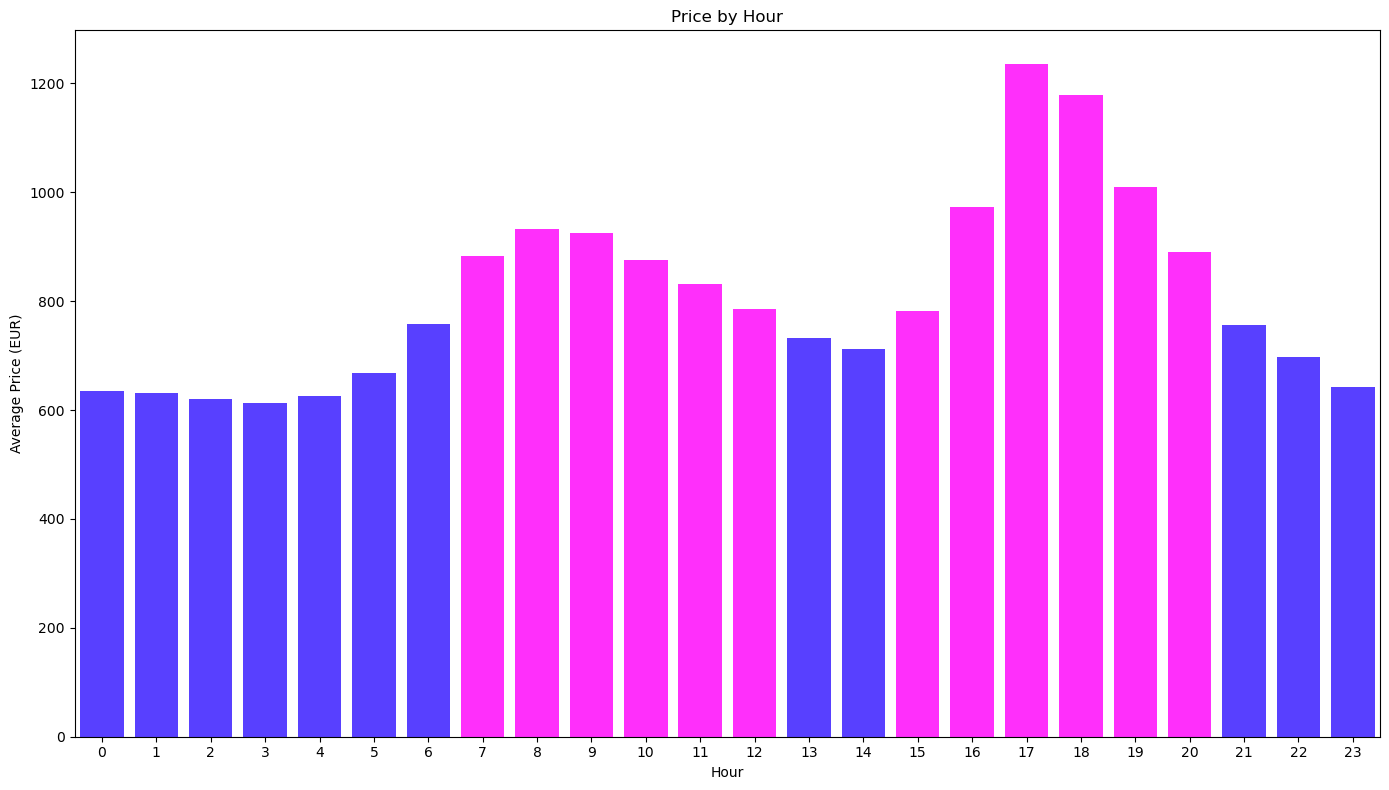

In [16]:
df4['utc_timestamp'] = pd.to_datetime(df4['utc_timestamp'])

# Extract the hour from 'utc_timestamp' and create a new column 'Hour'
df4['Hour'] = df4['utc_timestamp'].dt.hour

# Assume df4 has already been defined and prepared adequately

# Group by 'Hour' and average only the numeric columns
df_aggregated = df4.groupby(['Hour'], as_index=False).mean(numeric_only=True) # Continue with the visualization as before
# Select all numeric columns except 'Hour'
numeric_cols = df_aggregated.select_dtypes(include=['number']).columns.drop('Hour')

# Double the values for those selected columns
df_aggregated[numeric_cols] = df_aggregated[numeric_cols] * 2

plt.figure(figsize=(14, 8))
barplot = sns.barplot(data=df_aggregated, x='Hour', y='GB_load_price_day_ahead', color='lightblue')

# Find the indices of the 12 highest and 12 lowest bars
highest_values = df_aggregated['GB_load_price_day_ahead'].nlargest(12).index
lowest_values = df_aggregated['GB_load_price_day_ahead'].nsmallest(12).index

# Get the hour indices corresponding to the 12 highest and lowest bars
highest_hours = df_aggregated.loc[highest_values, 'Hour']
lowest_hours = df_aggregated.loc[lowest_values, 'Hour']

# Color the highest bars in magenta and the lowest bars in blue
for i, p in enumerate(barplot.patches):
    hour = df_aggregated.iloc[i]['Hour']
    if hour in highest_hours.values:
        p.set_facecolor('#FF2FFB')  # Magenta for the highest
    elif hour in lowest_hours.values:
        p.set_facecolor('#5840FF')  # Blue for the lowest

plt.title('Price by Hour')
plt.xlabel('Hour')
plt.ylabel('Average Price (EUR)')

plt.tight_layout()
plt.show()



**Insights from Visualization**:
- The bar plot clearly depicts how the average price of energy varies throughout the day, with prices peaking during specific hours and dipping during others.
- Hours marked in magenta represent the times with the highest energy costs, likely corresponding to peak demand periods. Conversely, the hours in blue denote the lowest costs, possibly during overnight or early morning hours when demand is lower.
- This information can be instrumental for energy consumers aiming to optimize their energy usage and costs, as well as for energy companies planning their production and pricing strategies.

**Strategic Implications**:
- **For Consumers**: Understanding these trends can help in planning energy usage around cheaper hours,


**Loading Historic Demand Data**

This code block involves loading the 'historic_demand_2009_2024_noNaN.csv' dataset into a DataFrame named `df5`. This dataset contains detailed electricity demand and generation data from various sources in England and Wales spanning from 2009 to 2024. This initial step is essential for understanding the dataset's structure, including available metrics and temporal details.

The initial loading and inspection of the data will reveal the types of energy generation included in the dataset (e.g., wind and solar) and their respective capacities, as well as overall demand in England and Wales. This step helps identify which columns will be crucial for further detailed analysis and which may be redundant or irrelevant.


In [17]:
df5 = pd.read_csv('historic_demand_2009_2024_noNaN.csv')
df5.head()

,settlement_date,settlement_period,period_hour,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,non_bm_stor,pump_storage_pumping,ifa_flow,ifa2_flow,britned_flow,moyle_flow,east_west_flow,nemo_flow,is_holiday
0,2009-01-01 00:00:00,1,0:00:00,37910,38704,33939,54,1403,0,0,0,33,2002,0,0,-161,0,0,1
1,2009-01-01 00:30:00,2,0:30:00,38047,38964,34072,53,1403,0,0,0,157,2002,0,0,-160,0,0,1
2,2009-01-01 01:00:00,3,1:00:00,37380,38651,33615,53,1403,0,0,0,511,2002,0,0,-160,0,0,1
3,2009-01-01 01:30:00,4,1:30:00,36426,37775,32526,50,1403,0,0,0,589,1772,0,0,-160,0,0,1
4,2009-01-01 02:00:00,5,2:00:00,35687,37298,31877,50,1403,0,0,0,851,1753,0,0,-160,0,0,1


In [18]:
df5 = df5[['settlement_date', 'england_wales_demand', 'embedded_wind_generation', 'embedded_wind_capacity', 'embedded_solar_generation', 'embedded_solar_capacity']]

In [19]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265746 entries, 0 to 265745
Data columns (total 6 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   settlement_date            265746 non-null  object
 1   england_wales_demand       265746 non-null  int64 
 2   embedded_wind_generation   265746 non-null  int64 
 3   embedded_wind_capacity     265746 non-null  int64 
 4   embedded_solar_generation  265746 non-null  int64 
 5   embedded_solar_capacity    265746 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 12.2+ MB


After loading the data, the next step is to refine the dataset by focusing on the most relevant columns for our analysis related to energy demand and renewable generation sources. This involves selecting specific columns related to overall demand and the contributions from embedded wind and solar generation.

- The DataFrame `df5` is now streamlined with only six columns, focusing on the core aspects of our energy analysis. This reduction simplifies future operations and improves the efficiency of data processing.
- The data type review confirms that all selected columns have complete data without any missing values, which is critical for maintaining the accuracy and reliability of our analysis.
- The `settlement_date` is identified as an object type, indicating the need for potential conversion to `datetime` format for any operations that require time-based grouping or sorting.

### Analyzing Solar Energy Generation by Hour <a id="Analyzing-Solar-Energy-Generation-by-Hour"></a>

This section focuses on transforming and analyzing the dataset to assess solar energy generation variations throughout the day. By converting the `settlement_date` to a `datetime` object and extracting the hour, we prepare the data for a time-based aggregation that helps reveal patterns in solar energy production.


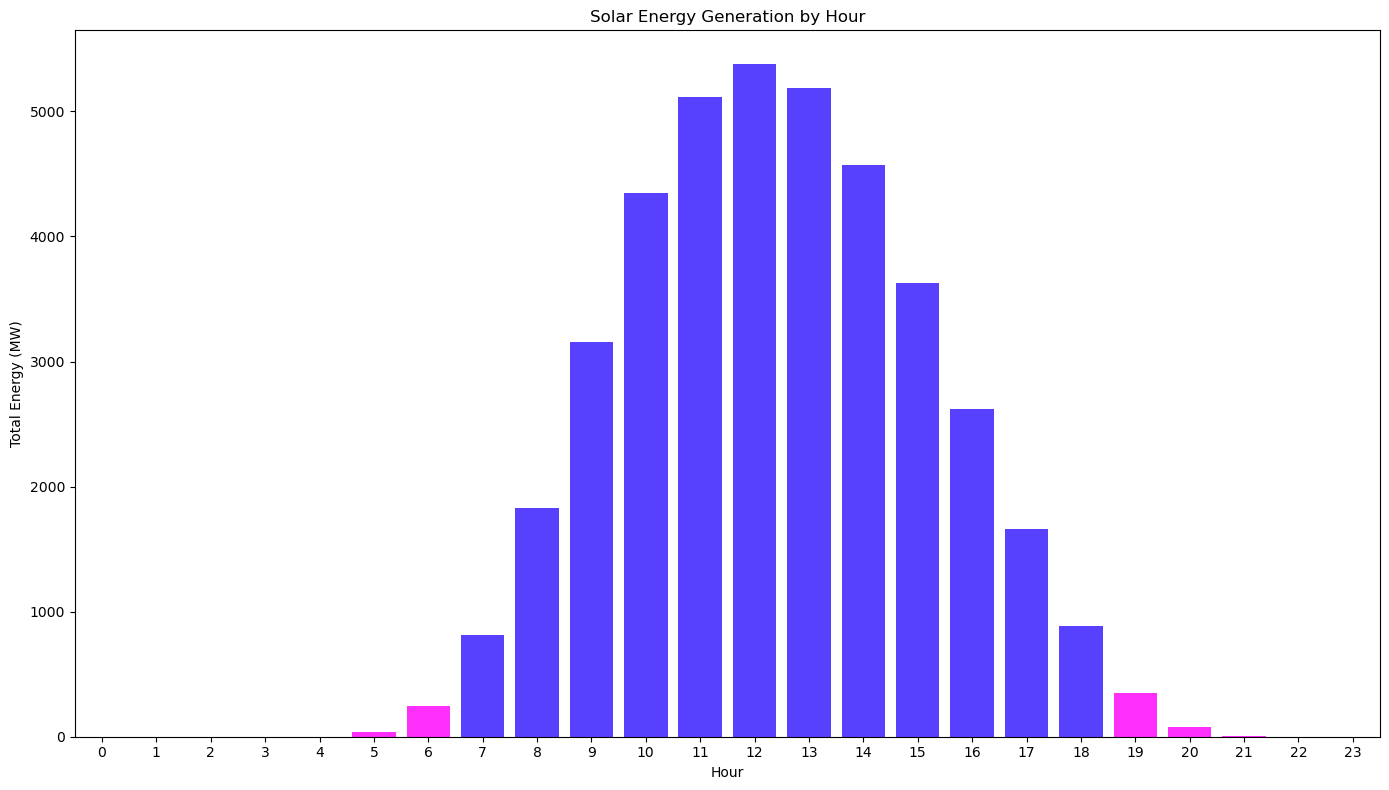

In [20]:
from scipy.signal import find_peaks

df5['settlement_date'] = pd.to_datetime(df5['settlement_date'])

# Extract the hour from 'settlement_date' and create a new column 'Hour'
df5['Hour'] = df5['settlement_date'].dt.hour

# Assume df5 has already been defined and prepared adequately

# Group by 'Hour' and average only the numeric columns
df_aggregated1 = df5.groupby(['Hour'], as_index=False).mean(numeric_only=True)

# Select all numeric columns except 'Hour'
numeric_cols = df_aggregated1.select_dtypes(include=['number']).columns.drop('Hour')

# Double the values only for those selected columns
df_aggregated1[numeric_cols] = df_aggregated1[numeric_cols] * 2

# Assume df_aggregated1 has already been prepared correctly
# Sort the DataFrame by 'embedded_solar_generation' to identify the top 12 highest and lowest
df_sorted = df_aggregated1.sort_values(by='embedded_solar_generation', ascending=False)

# Obtain the hours corresponding to the top 12 highest and lowest values
highest_hours = df_sorted['Hour'].head(12)
lowest_hours = df_sorted['Hour'].tail(12)

plt.figure(figsize=(14, 8))
barplot = sns.barplot(data=df_aggregated1, x='Hour', y='embedded_solar_generation', color='lightblue')

# Set specific colors for the hours corresponding to the top 12 highest and lowest values
for p in barplot.patches:
    hour = int(p.get_x() + 0.5)  # +0.5 to center within the hour range
    if hour in highest_hours.values:
        p.set_facecolor('#5840FF')  # Blue for the highest
    elif hour in lowest_hours.values:
        p.set_facecolor('#FF2FFB')  # Magenta for the lowest

plt.title('Solar Energy Generation by Hour')
plt.xlabel('Hour')
plt.ylabel('Total Energy (MW)')

plt.tight_layout()
plt.show()


Utilizing the processed data, this visualization aims to display the average solar energy generation by hour, highlighting the hours with the highest and lowest generation to understand daily dynamics in solar energy supply.

**Visualization Details**:
- **Bar Plot**: Each bar represents an average solar generation for a specific hour of the day.
- **Color Coding**: Bars are color-coded to distinguish between the highest and lowest periods of solar generation. Blue bars indicate hours with the highest solar output, and magenta bars represent the lowest, making it easy to visually identify peak and off-peak times.

**Insights**:
- Peak solar generation typically occurs during midday hours when sunlight is most abundant. The specific hours identified as having the highest output can be crucial for planning energy storage and distribution.
- Low generation times, often during early morning or late evening, highlight potential gaps in energy availability where storage solutions or supplementary energy sources might be needed.

**Strategic Implications**:
- Energy companies can use this data to optimize their operations, adjusting production schedules, and improving grid management based on solar availability.
- Policymakers and planners can consider these trends when designing incentives for solar power adoption or for integrating solar energy into the public utility framework.

**Next Steps**:
- Further analysis could explore seasonal variations in solar generation or compare solar output with demand patterns to refine energy strategies further.


### Analysis of Wind Energy Generation Trends <a id="Analysis-of-Wind-Energy-Generation-Trends"></a>

This visualization focuses on identifying and highlighting the hours of the day that experience the highest and lowest wind energy generation. By examining these patterns, we can gain insights into the effectiveness of wind energy systems and their daily operational dynamics.

The bar chart will clearly illustrate how wind energy generation varies by hour, with specific colors marking the highest and lowest periods. This visualization aids in understanding the variability of wind energy, which is crucial for optimizing grid integration and planning energy storage.


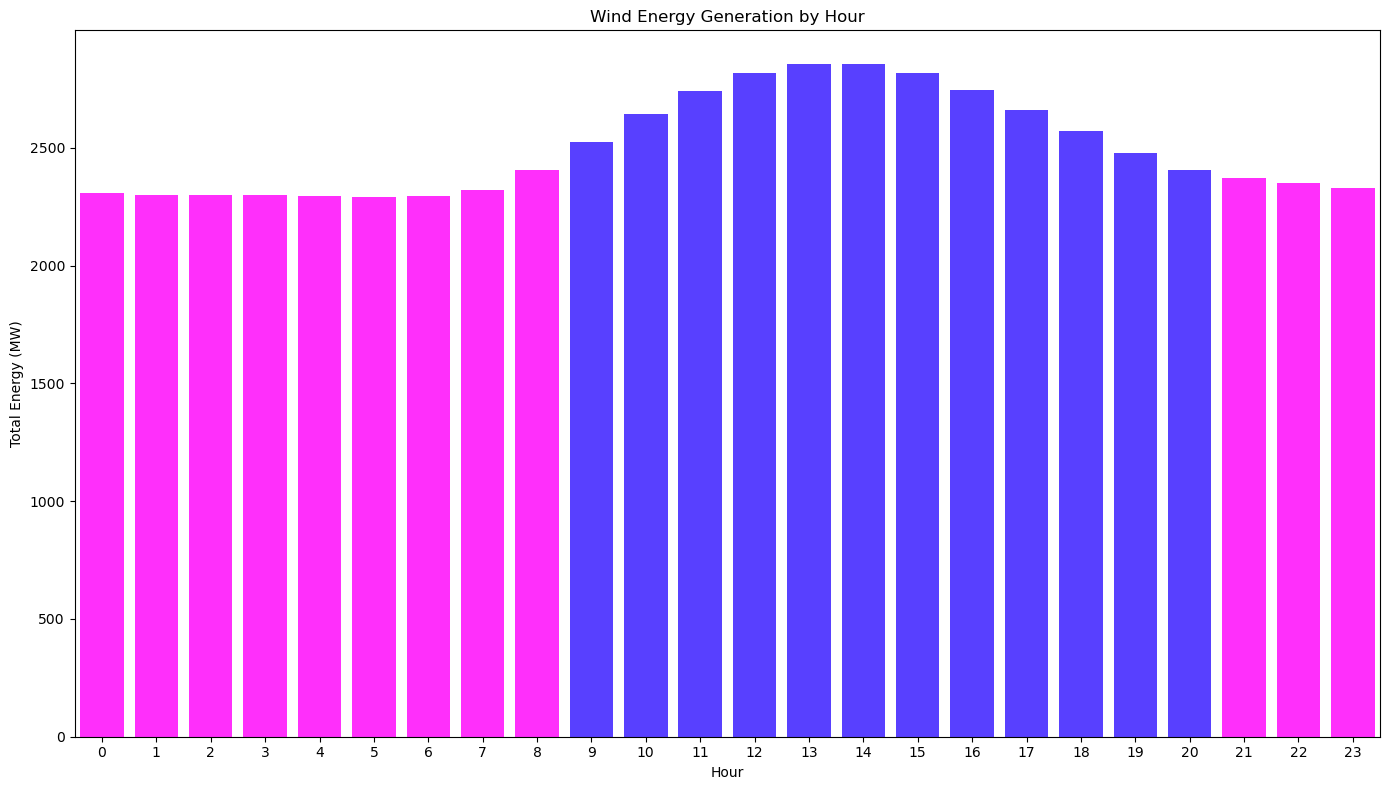

In [21]:
plt.figure(figsize=(14, 8))

wind_generation = df_aggregated1['embedded_wind_generation'].values

# Find the indices of the 12 highest and 12 lowest bars
highest_values_idx = df_aggregated1['embedded_wind_generation'].nlargest(12).index
lowest_values_idx = df_aggregated1['embedded_wind_generation'].nsmallest(12).index

# Create the bar chart
barplot = sns.barplot(data=df_aggregated1, x='Hour', y='embedded_wind_generation', color='lightblue')

# Color the 12 highest bars in blue and the 12 lowest bars in magenta
for i, patch in enumerate(barplot.patches):
    if i in highest_values_idx:
        patch.set_facecolor('#5840FF')  # Blue for the highest
    elif i in lowest_values_idx:
        patch.set_facecolor('#FF2FFB')  # Magenta for the lowest

plt.title('Wind Energy Generation by Hour')
plt.xlabel('Hour')
plt.ylabel('Total Energy (MW)')

plt.tight_layout()
plt.show()



The bar chart "Wind Energy Generation by Hour" vividly displays how wind energy output varies throughout the day. It uses a color-coding system—magenta for the lowest hours and blue for the highest hours—to emphasize the variability in energy production.

**Key Observations**:
- **High Production Hours (Blue Bars)**: The hours highlighted in blue represent periods of the day with the highest wind energy output. These hours are likely influenced by optimal wind conditions, which could include higher wind speeds typical of early evening or early morning in many regions. Identifying these peak times is crucial for grid operators and energy managers, as it allows for strategic planning around wind energy utilization and integration into the power grid.
- **Low Production Hours (Magenta Bars)**: Conversely, the magenta bars indicate the hours with the lowest energy production. These periods might coincide with naturally lower wind speeds, such as during late night or midday, or could reflect geographic and seasonal impacts on wind patterns. Understanding these low points is essential for balancing the grid, particularly in regions heavily reliant on wind power.

**Strategic Implications**:
- **Energy Storage and Demand Response**: The insights from this chart can inform decisions on energy storage and demand response strategies. For example, energy stored during peak wind production hours could be released during low production hours to meet demand without needing to rely on fossil fuels.
- **Infrastructure Investment**: For regions looking to expand their renewable energy capabilities, understanding the daily patterns of wind energy generation can guide investments in new turbines and enhancements to existing installations. Furthermore, these insights can influence the placement of new turbines in locations that will maximize output during peak demand hours.
- **Policy and Planning**: Policymakers can use this data to craft incentives or regulations that support renewable energy integration, such as tariffs that encourage energy consumption during high production hours or subsidies for energy storage solutions.

**Further Research**:
- **Seasonal Variations**: Future analyses could extend to examining how these patterns change with the seasons, as wind patterns can vary significantly between winter and summer months.
- **Comparative Analysis with Other Renewables**: Comparing wind energy generation patterns with those of other renewable sources, such as solar power, could offer a fuller picture of how different energy sources can complement each other to provide a stable and sustainable energy supply.

**Conclusion**:
This detailed hourly analysis of wind energy generation underscores the dynamic nature of wind power and highlights the importance of strategic planning and infrastructure design to maximize the benefits of renewable energy. By aligning operational and planning strategies with these patterns, stakeholders can enhance the efficiency and reliability of wind energy, contributing to broader energy security and sustainability goals.

### Visualizing Hourly Energy Demand <a id="Visualizing-Hourly-Energy-Demand"></a>

This visualization aims to illustrate the fluctuations in energy demand across different hours of the day. By identifying the hours with the highest and lowest energy demands, we can better understand daily energy consumption patterns, which is crucial for effective energy management and planning.

The bar chart will visually depict the variation in hourly energy demand, with color-coded bars allowing quick identification of critical periods of high and low energy usage. This visualization aids stakeholders in assessing when energy consumption is at its peak and when it dips, which is essential for tailoring energy supply strategies, adjusting pricing, and planning load management.

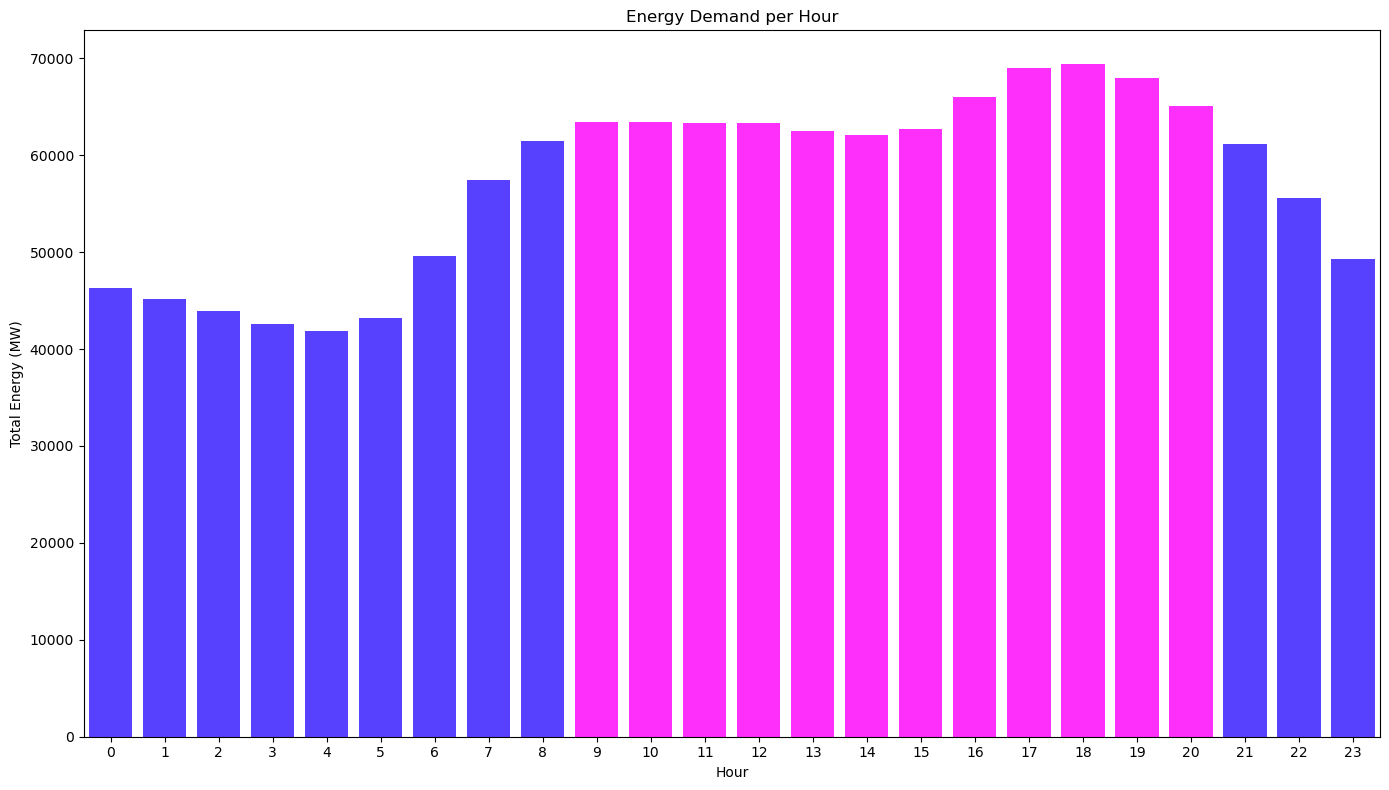

In [22]:
plt.figure(figsize=(14, 8))

# Find the indices of the 12 highest and 12 lowest bars based on energy demand
highest_values_idx = df_aggregated1['england_wales_demand'].nlargest(12).index
lowest_values_idx = df_aggregated1['england_wales_demand'].nsmallest(12).index

# Create the bar chart
barplot = sns.barplot(data=df_aggregated1, x='Hour', y='england_wales_demand', color='lightblue')

# Color the 12 highest bars in magenta and the 12 lowest bars in blue
for i, patch in enumerate(barplot.patches):
    if i in highest_values_idx:
        patch.set_facecolor('#FF2FFB')  # Magenta for the highest
    elif i in lowest_values_idx:
        patch.set_facecolor('#5840FF')  # Blue for the lowest

plt.title('Energy Demand per Hour')
plt.xlabel('Hour')
plt.ylabel('Total Energy (MW)')

plt.tight_layout()
plt.show()



**Insights from Visualization**:
- The bar chart displays distinct patterns of energy consumption throughout the day, with peak times likely coinciding with industrial operation hours and evening times when residential consumption is high.
- Hours marked in magenta (peak demand) could inform utility companies and grid operators about the need for increased energy supply or the activation of demand response strategies to manage the load effectively without overstraining the energy infrastructure.
- Conversely, the hours shown in blue (low demand) may represent opportunities for performing grid maintenance or integrating renewable energy sources more effectively, as the lower demand reduces the risk associated with intermittency.

**Strategic Implications**:
- **Energy Pricing**: Knowledge of demand patterns can assist in structuring dynamic pricing models that encourage energy usage during off-peak hours, helping to balance the load on the grid.
- **Infrastructure Planning**: Understanding peak demand times can guide investments in infrastructure upgrades to handle high loads, as well as in energy storage technologies that can store excess energy during low demand periods for use during peak times.
- **Renewable Energy Integration**: Low demand hours could be targeted for increased renewable energy output, reducing reliance on fossil fuels and enhancing the sustainability of the energy grid.

**Conclusion**:
This detailed analysis of hourly energy demand provides critical insights that can help shape energy policy, operational strategies, and investment decisions in the energy sector. By aligning energy supply with demand patterns, stakeholders can improve efficiency, reduce costs, and enhance the stability of the energy system.

**Calculating Total Energy Demand**

To gain a broader perspective on the total energy consumption, this operation computes the sum of the `england_wales_demand` across all aggregated hourly data. This metric is crucial for assessing the overall energy load managed by the grid over the observed periods and can serve as a benchmark for evaluating efficiency and planning capacity.


In [23]:
sum = df_aggregated1['england_wales_demand'].sum()

**Sorting Data by Wind Energy Generation**

This operation aims to reorder the `df5` DataFrame based on the `embedded_wind_generation` column in descending order. Sorting the data in this manner allows for quick identification of periods with the highest wind energy output, which are critical for analyzing the effectiveness of wind energy integration and its contribution to overall energy supply.


In [24]:
df5.sort_values(by='embedded_wind_generation', ascending=False)

,settlement_date,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,Hour
263295,2024-01-23 22:30:00,23332,5587,6488,0,15905,22
263203,2024-01-22 00:30:00,21592,5548,6488,0,15905,0
261685,2023-12-21 09:30:00,29711,5539,6488,546,15905,9
263204,2024-01-22 01:00:00,21175,5536,6488,0,15905,1
261686,2023-12-21 10:00:00,29449,5536,6488,827,15905,10
...,...,...,...,...,...,...,...
3694,2009-03-18 23:00:00,29727,0,1419,0,0,23
3693,2009-03-18 22:30:00,31808,0,1419,0,0,22
13679,2009-10-15 00:30:00,23912,0,1737,0,0,0
13680,2009-10-15 01:00:00,24264,0,1737,0,0,1


**Data Integration and Normalization for Demand Analysis**

This block of code aims to integrate different energy data sources into a single DataFrame, normalize the data to a common scale, and adjust the values to meet specific aggregate criteria. This approach helps in comparing different types of energy data directly and enables a more balanced view of energy generation versus demand.


In [25]:
from sklearn.preprocessing import MinMaxScaler


In [26]:
df6 = pd.merge(df_aggregated[["Hour", 'GB_load_price_day_ahead']], df_aggregated1[['Hour', 'embedded_solar_generation', 'embedded_wind_generation']], on='Hour')

In [27]:
# Create an instance of StandardScaler
scaler = MinMaxScaler()

# Fit the scaler to the data and then transform it
df6[['GB_load_price_day_ahead', 'embedded_solar_generation', 'embedded_wind_generation']] = scaler.fit_transform(df6[['GB_load_price_day_ahead', 'embedded_solar_generation', 'embedded_wind_generation']])




In [28]:
df6['demand'] = (df6['embedded_wind_generation'] + df6['embedded_solar_generation']) / 2

In [29]:
df6['demand'] = (df6['demand'] + (1 -df6['GB_load_price_day_ahead'])) / 2

In [30]:
desired_sum = sum  

# Calculate the current sum of the values in the scaled column
current_sum = df6['demand'].sum()

# Determine the required scaling factor
scaling_factor = desired_sum / current_sum

# Multiply each value in the column by the scaling factor
df6['demand'] = df6['demand'] * scaling_factor





After scaling and integrating various data sources, this section ensures that the new 'demand' metric aligns with historical demand patterns by adjusting the aggregate to match a pre-defined sum (`desired_sum`). This validation step is critical for maintaining the reliability and accuracy of our analytical outputs.

### Visualizing Ideal Hourly Energy Demand <a id="Visualizing-Ideal-Hourly-Energy-Demand"></a>

This visualization aims to highlight the fluctuations in idealized energy demand throughout the day by identifying and color-coding the highest and lowest demand hours. This approach provides insights into peak and off-peak energy usage patterns, crucial for effective energy management and planning.

The bar chart will clearly display the hourly distribution of ideal energy demand, with color-coded highlights that facilitate easy identification of periods with unusually high or low demand. This visualization supports energy stakeholders in strategic decision-making related to energy production, grid management, and demand response initiatives.


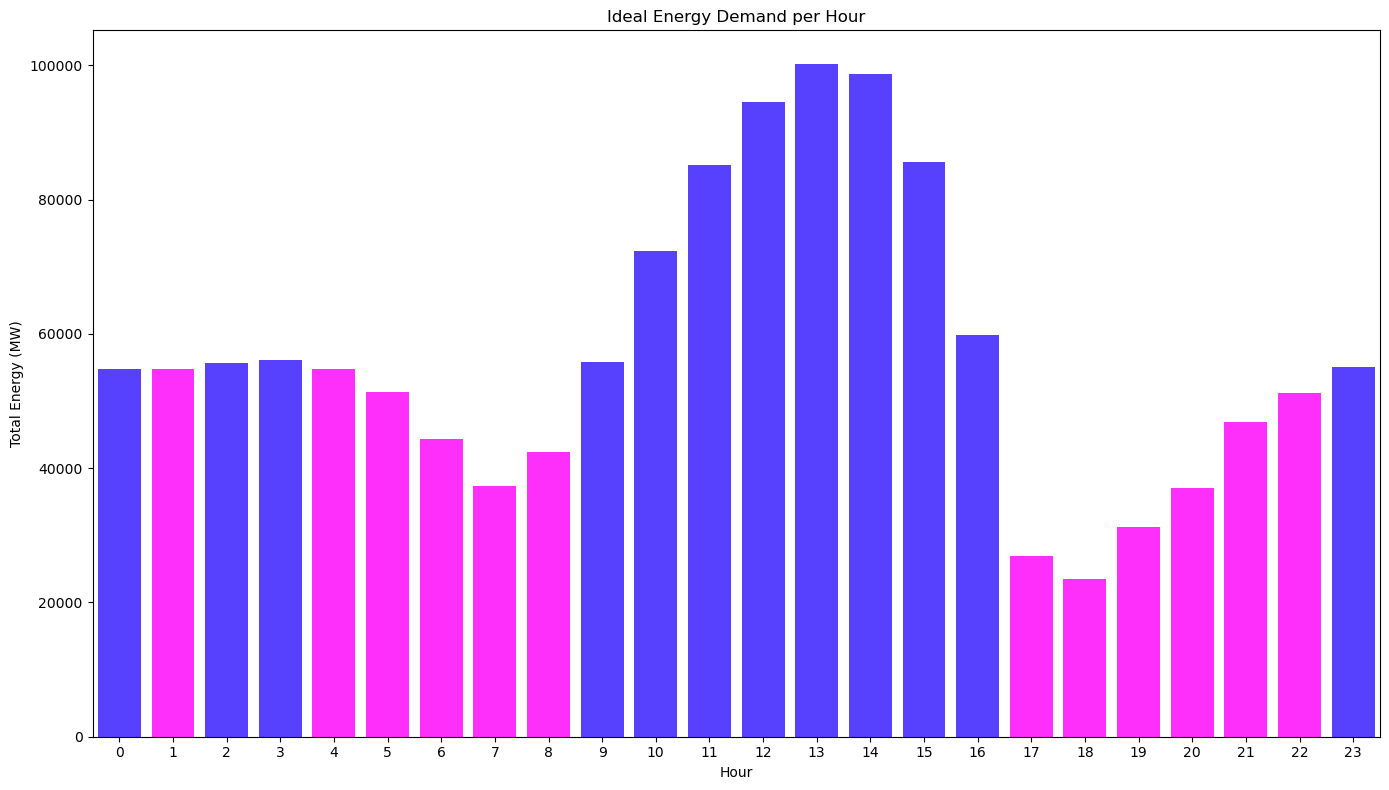

In [31]:
plt.figure(figsize=(14, 8))

# Find the indices of the 12 highest and 12 lowest bars based on energy demand
highest_values_idx = df6['demand'].nlargest(12).index
lowest_values_idx = df6['demand'].nsmallest(12).index

# Create the bar chart
barplot = sns.barplot(data=df6, x='Hour', y='demand', color='lightblue')

# Color the 12 highest bars in blue and the 12 lowest bars in magenta
for i, patch in enumerate(barplot.patches):
    if df6.iloc[i].name in highest_values_idx:
        patch.set_facecolor('#5840FF')  # Blue for the highest
    elif df6.iloc[i].name in lowest_values_idx:
        patch.set_facecolor('#FF2FFB')  # Magenta for the lowest

plt.title('Ideal Energy Demand per Hour')
plt.xlabel('Hour')
plt.ylabel('Total Energy (MW)')

plt.tight_layout()
plt.show()



**Overview of Visualization**:
The "Ideal Energy Demand per Hour" chart showcases the theoretical or desired energy consumption patterns over a 24-hour cycle for Octopus Energy customers. The visualization uses blue to highlight peak demand hours and magenta for the lowest demand periods, illustrating when energy usage should ideally increase or decrease to align with efficient energy management and sustainability goals.

**Customer-Specific Observations**:
- **Peak Demand Hours (Blue Bars)**: These hours are marked as ideal times for high energy consumption, which might align with Octopus Energy's time-of-use tariffs that incentivize customers to use energy during off-peak or renewable-heavy production periods. The aim is to match energy demand with periods of high renewable energy generation, like wind and solar, which tend to be variable throughout the day.
- **Low Demand Hours (Magenta Bars)**: Conversely, these periods indicate times when it would be ideal for customers to minimize their energy usage. This can help balance the grid, especially during times when renewable energy generation is low and typical demand would otherwise require tapping into less sustainable energy sources.

**Strategic Implications for Octopus Energy**:
- **Demand Response**: Encouraging customers to shift their usage to blue bar hours could help Octopus Energy manage the load more effectively, reducing strain during traditional peak times and maximizing the use of renewable energy.
- **Energy Pricing Plans**: By understanding and predicting these ideal demand patterns, Octopus Energy can design pricing plans that further incentivize customers to use energy during optimal times, both for cost-saving and environmental benefits.
- **Customer Engagement**: Educating customers about the impact of their energy use on the grid and the environment can drive more sustainable usage habits. This chart can be a tool in those efforts, helping customers visualize and understand the best times for energy consumption based on their specific tariff and the broader goals of energy efficiency.

**Conclusion**:
For Octopus Energy, aligning customer demand with these ideal patterns is not just about managing energy more efficiently—it's also about leading the charge towards a more sustainable future. By optimizing when and how energy is consumed, Octopus Energy can enhance its operational efficiency, support the stability of the grid, and contribute to the reduction of carbon emissions, all while potentially offering cost savings to its customers.

## Conclusion <a id="Conclusion"></a>

**Key Insights and Implications**

Throughout this notebook, we have undertaken a detailed examination of energy consumption patterns, focusing on Octopus Energy's ideal demand scenarios. By visualizing and analyzing hourly energy demand, solar and wind generation data, we have uncovered valuable insights that could inform both strategic decision-making and operational adjustments:

- Peak and Off-Peak Patterns**: We identified specific hours that represent peak and off-peak energy demands. These insights are crucial for implementing dynamic pricing strategies and demand response programs that encourage energy use when it is most environmentally and economically beneficial.

- Integration of Renewable Energy**: The analysis highlighted the best times to leverage renewable energy generation, such as wind and solar, aligning customer usage with these periods to optimize the use of renewable resources and reduce reliance on non-renewable energy sources.

- Energy Management Strategies**: By understanding fluctuations in energy demand and generation, Octopus Energy can enhance grid management and energy storage solutions, ensuring energy availability during peak periods and stability throughout the grid.

**Strategic Recommendations**

- Tailored Pricing Plans: Develop and promote time-of-use tariffs that incentivize energy usage during hours of high renewable energy generation and low overall demand, supporting both cost savings and environmental objectives.

- Customer Engagement and Education: Continue to educate customers about how their usage impacts the grid and the environment, and how they can participate in energy-saving programs, contributing to a more sustainable energy ecosystem.

- Enhanced Data Analytics: Invest in advanced analytics capabilities to further refine the understanding of energy patterns and improve forecast accuracy, which will facilitate more effective grid management and strategic planning.

**Future Directions**

- Seasonal Analysis: Expand the analysis to include seasonal variations in energy demand and renewable energy availability to tailor strategies throughout the year.

- Comparative Analysis: Compare the energy patterns of Octopus Energy customers with broader market trends to identify unique opportunities or challenges specific to Octopus Energy’s customer base.

- Technological Integration: Explore the integration of smart home technologies that can automatically adjust consumption based on real-time energy generation data, enhancing convenience for customers and efficiency for the grid.

**Closing Thoughts**

This notebook has provided a foundation for understanding energy consumption dynamics and outlined approaches that can lead to more efficient energy use and support the transition to a renewable-led energy system. Octopus Energy is well-positioned to lead by example, using data-driven insights to promote sustainability, enhance customer experiences, and drive the future of energy. Moving forward, continuous analysis and adaptation of strategies in response to emerging data will be key to achieving these ambitious goals.
